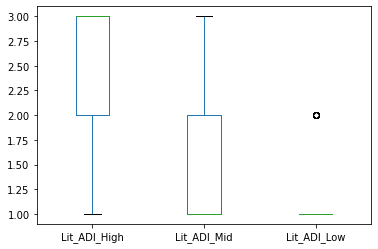

In [2]:
# load packages
import pandas as pd
# load data file
d = pd.read_excel("/Users/adhyadagar/Desktop/ANOVA.xlsx")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['Lit_ADI_High', 'Lit_ADI_Mid', 'Lit_ADI_Low'], grid=False)

In [3]:
# load packages
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(d['Lit_ADI_High'], d['Lit_ADI_Mid'], d['Lit_ADI_Low'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05



301.6402133771027 3.163624435234386e-86


In [5]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['Lit_ADI_High', 'Lit_ADI_Mid', 'Lit_ADI_Low'])
# replace column names
d_melt.columns = ['index', 'LevelOfLiteracyOfMigrants', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(LevelOfLiteracyOfMigrants)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(LevelOfLiteracyOfMigrants),181.10303,2.0,301.640213,3.163624e-86
Residual,147.69697,492.0,NaN,NaN


In [6]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['LevelOfLiteracyOfMigrants'], alpha=0.05)
print(m_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------------
Lit_ADI_High Lit_ADI_Low  -1.4667 0.001 -1.6085 -1.3249   True
Lit_ADI_High Lit_ADI_Mid  -0.9152 0.001  -1.057 -0.7733   True
 Lit_ADI_Low Lit_ADI_Mid   0.5515 0.001  0.4097  0.6933   True
--------------------------------------------------------------
